# Explanatory Data Analysis Challenge (Olympic Games)

## Data Import and Inspection

Import the Datasets Summer (__summer.csv__), Winter (__winter.csv__) and dictionary (__dictionary.csv__) and Inspect! 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
summer = pd.read_csv("summer.csv")
winter = pd.read_csv("winter.csv")
dictionary = pd.read_csv("dictionary.csv")

In [4]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [5]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [6]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [7]:
winter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5770 non-null   int64 
 1   City        5770 non-null   object
 2   Sport       5770 non-null   object
 3   Discipline  5770 non-null   object
 4   Athlete     5770 non-null   object
 5   Country     5770 non-null   object
 6   Gender      5770 non-null   object
 7   Event       5770 non-null   object
 8   Medal       5770 non-null   object
dtypes: int64(1), object(8)
memory usage: 405.8+ KB


In [8]:
dictionary.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [9]:
dictionary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         201 non-null    object 
 1   Code            201 non-null    object 
 2   Population      196 non-null    float64
 3   GDP per Capita  176 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


## Merging and Concatenating

1. __Merge__ Summer and Winter (one row for each Medal awarded in any Olympic Games) and save the merged DataFrame in __olympics__. 
2. An __additional column__ (e.g. "Edition") shall indicate the Edition -> __Summer or Winter__.
3. Add the __full Country name__ from dictionary to olympics (e.g. France for FRA).

In [10]:
# Ignore_Index MUST BE FALSE to create a multi-index
olympics = pd.concat([summer,winter], ignore_index=False, keys = ["Summer", "Winter"], names = ["Edition"])
olympics = olympics.reset_index().drop(columns="level_1")

# You could have also concatenated your operations!
# olympics = pd.concat([summer,winter], ignore_index=False, keys = ["Summer", "Winter"],
#                      names = ["Edition"]).reset_index().drop(columns="level_1")

# For different column names, specify the "on" parameter as left "on" and right "on"
# Left to prioritize left dataframe and simply add columns of the right dataframe
olympics = olympics.merge(dictionary, how = "left", left_on = "Country", right_on = "Code",
                          suffixes=["_1","_2"], indicator = False)
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Country_1,Gender,Event,Medal,Country_2,Code,Population,GDP per Capita
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,HUN,9844686.0,12363.543460
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,AUT,8611088.0,43774.985174
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,GRE,10823732.0,18002.230578
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,GRE,10823732.0,18002.230578
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,GRE,10823732.0,18002.230578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom,GBR,65138232.0,43875.969614
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States,USA,321418820.0,56115.718426
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada,CAN,35851774.0,43248.529909
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic,CZE,10551219.0,17548.338213


## Data Cleaning (Part 1)

1. If you haven´t done it yet: Assign appropriate __Column Headers__ to Country Codes (e.g. __"Code"__) and full Country Names (e.g. __"Country"__).
2. __Remove Spaces__ from column headers in olympics and dictionary.
3. For some Country Codes, there is no corresponding __full Country Name__ available (e.g. for "URS") -> __missing values__ in olympics. Identify these Country Codes and search the Web for the full Country Names. __Replace__ missing values! (Alternatively, you can find a Solution for this at the end of this Notebook!) 

In [11]:
olympics.drop(columns="Code", inplace=True) # DO NOT drop original data (Country_1) !!! Drop the common on the right!
olympics.rename(columns = {"Country_1":"Code","Country_2":"Country"}, inplace = True)
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.543460
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,8611088.0,43774.985174
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,10823732.0,18002.230578
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,10823732.0,18002.230578
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,10823732.0,18002.230578
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom,65138232.0,43875.969614
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States,321418820.0,56115.718426
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada,35851774.0,43248.529909
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic,10551219.0,17548.338213


In [12]:
olympics.columns = olympics.columns.str.strip()
olympics.columns
dictionary.columns = dictionary.columns.str.strip()
dictionary.columns

Index(['Country', 'Code', 'Population', 'GDP per Capita'], dtype='object')

In [13]:
olympics.rename(columns = {"GDP per Capita":"GDP"}, inplace = True)

In [14]:
olympics.info() # A rather incomplete dictionary...

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36935 entries, 0 to 36934
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Edition     36935 non-null  object 
 1   Year        36935 non-null  int64  
 2   City        36935 non-null  object 
 3   Sport       36935 non-null  object 
 4   Discipline  36935 non-null  object 
 5   Athlete     36935 non-null  object 
 6   Code        36931 non-null  object 
 7   Gender      36935 non-null  object 
 8   Event       36935 non-null  object 
 9   Medal       36935 non-null  object 
 10  Country     30568 non-null  object 
 11  Population  30522 non-null  float64
 12  GDP         29957 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 3.9+ MB


In [15]:
# NA Handling
olympics.isna().sum(axis = 0) # A lot of countries missing where we have the code!

Edition          0
Year             0
City             0
Sport            0
Discipline       0
Athlete          0
Code             4
Gender           0
Event            0
Medal            0
Country       6367
Population    6413
GDP           6978
dtype: int64

In [16]:
olympics[olympics.Country.isna() & olympics.Code.notna()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP
132,Summer,1896,Athens,Tennis,Tennis,"FLACK, Edwin",ZZX,Men,Doubles,Bronze,NaN,NaN,NaN
133,Summer,1896,Athens,Tennis,Tennis,"ROBERTSON, George Stuart",ZZX,Men,Doubles,Bronze,NaN,NaN,NaN
134,Summer,1896,Athens,Tennis,Tennis,"BOLAND, John",ZZX,Men,Doubles,Gold,NaN,NaN,NaN
135,Summer,1896,Athens,Tennis,Tennis,"TRAUN, Friedrich",ZZX,Men,Doubles,Gold,NaN,NaN,NaN
136,Summer,1896,Athens,Tennis,Tennis,"KASDAGLIS, Dionysios",ZZX,Men,Doubles,Silver,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33961,Winter,1992,Albertville,Skiing,Freestyle Skiing,"KOZHEVNIKOVA, Yelizaveta",EUN,Women,Moguls,Silver,NaN,NaN,NaN
33977,Winter,1992,Albertville,Skiing,Ski Jumping,"GODER, Tomas",TCH,Men,K120 Team (90M),Bronze,NaN,NaN,NaN
33978,Winter,1992,Albertville,Skiing,Ski Jumping,"JEZ, Frantisek",TCH,Men,K120 Team (90M),Bronze,NaN,NaN,NaN
33979,Winter,1992,Albertville,Skiing,Ski Jumping,"PARMA, Jiri",TCH,Men,K120 Team (90M),Bronze,NaN,NaN,NaN


In [17]:
# Filling Data
# olympics.loc[olympics.Code=="ZZX", "Country"] = "Mixed Team"
# olympics.loc[olympics.Code=="BOH", "Country"] = "Bohemia"
# olympics.loc[olympics.Code=="ANZ", "Country"] = "Australasia"
# olympics.loc[olympics.Code=="RU1", "Country"] = "Russian Empire"
# olympics.loc[olympics.Code=="TCH", "Country"] = "Czechoslovakia"
# olympics.loc[olympics.Code=="YUG", "Country"] = "Yugoslavia"
# olympics.loc[olympics.Code=="ROU", "Country"] = "Romania"
# olympics.loc[olympics.Code=="EUN", "Country"] = "Unified Team"
# olympics.loc[olympics.Code=="URS", "Country"] = "Soviet Union"
# olympics.loc[olympics.Code=="EUA", "Country"] = "United Team of Germany"
# olympics.loc[olympics.Code=="FRG", "Country"] = "West Germany"
# olympics.loc[olympics.Code=="GDR", "Country"] = "East Germany"
# olympics.loc[olympics.Code=="BWI", "Country"] = "British West Indies"
# olympics.loc[olympics.Code=="SRB", "Country"] = "Serbia"
# olympics.loc[olympics.Code=="TTO", "Country"] = "Trinidad and Tobago"
# olympics.loc[olympics.Code=="MNE", "Country"] = "Montenegro"
# olympics.loc[olympics.Code=="IOP", "Country"] = "Independent Olympic Participants"
# olympics.loc[olympics.Code=="SGP", "Country"] = "Singapore"

# olympics[olympics.Country.isna() & olympics.Code.notna()] # No empty Country

In [18]:
# A better and MUCH FASTER method to fill specific NA
missing_C_index = olympics.loc[olympics.Country.isna()].index              # 1.Get all indexes with empty country

In [19]:
olympics.loc[olympics.Country.isna()].Code.value_counts()                  # 2.Check occurrences of Code from high to low

URS    2489
GDR     987
ROU     642
FRG     584
TCH     487
YUG     442
EUN     283
EUA     281
ZZX      48
SRB      31
ANZ      29
RU1      17
MNE      14
TTO      10
BOH       7
BWI       5
SGP       4
IOP       3
Name: Code, dtype: int64

In [20]:
old_c = olympics.loc[olympics.Country.isna(), :].Code.value_counts().index # 3.Save those Codes' indexes

In [21]:
mapper = pd.Series(index=old_c, name="Country", data=["Soviet Union","East Germany","Romania","West Germany","Czechoslovakia",
                                                      "Yugoslavia","Unified Team","United Team of Germany","Mixed Team",
                                                      "Serbia","Australasia","Russian Empire","Montenegro",
                                                      "Trinidad and Tobago","Bohemia","British West Indies",
                                                      "Singapore","Independent Olympic Participants"])
mapper                                                                     # 4.Map Code indexes, with country column
                                                                           # with the data, from high to low

URS                        Soviet Union
GDR                        East Germany
ROU                             Romania
FRG                        West Germany
TCH                      Czechoslovakia
YUG                          Yugoslavia
EUN                        Unified Team
EUA              United Team of Germany
ZZX                          Mixed Team
SRB                              Serbia
ANZ                         Australasia
RU1                      Russian Empire
MNE                          Montenegro
TTO                 Trinidad and Tobago
BOH                             Bohemia
BWI                 British West Indies
SGP                           Singapore
IOP    Independent Olympic Participants
Name: Country, dtype: object

In [22]:
olympics.loc[missing_C_index,"Code"].map(mapper)                           # 5. Check the mapper works

132          Mixed Team
133          Mixed Team
134          Mixed Team
135          Mixed Team
136          Mixed Team
              ...      
33961      Unified Team
33977    Czechoslovakia
33978    Czechoslovakia
33979    Czechoslovakia
33980    Czechoslovakia
Name: Code, Length: 6367, dtype: object

In [23]:
olympics.Country.fillna(olympics.Code.map(mapper),inplace=True)            # Replace data and save

In [24]:
olympics.loc[missing_C_index]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP
132,Summer,1896,Athens,Tennis,Tennis,"FLACK, Edwin",ZZX,Men,Doubles,Bronze,Mixed Team,NaN,NaN
133,Summer,1896,Athens,Tennis,Tennis,"ROBERTSON, George Stuart",ZZX,Men,Doubles,Bronze,Mixed Team,NaN,NaN
134,Summer,1896,Athens,Tennis,Tennis,"BOLAND, John",ZZX,Men,Doubles,Gold,Mixed Team,NaN,NaN
135,Summer,1896,Athens,Tennis,Tennis,"TRAUN, Friedrich",ZZX,Men,Doubles,Gold,Mixed Team,NaN,NaN
136,Summer,1896,Athens,Tennis,Tennis,"KASDAGLIS, Dionysios",ZZX,Men,Doubles,Silver,Mixed Team,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33961,Winter,1992,Albertville,Skiing,Freestyle Skiing,"KOZHEVNIKOVA, Yelizaveta",EUN,Women,Moguls,Silver,Unified Team,NaN,NaN
33977,Winter,1992,Albertville,Skiing,Ski Jumping,"GODER, Tomas",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia,NaN,NaN
33978,Winter,1992,Albertville,Skiing,Ski Jumping,"JEZ, Frantisek",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia,NaN,NaN
33979,Winter,1992,Albertville,Skiing,Ski Jumping,"PARMA, Jiri",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia,NaN,NaN


## Data Cleaning (Part 2)

1. __Remove rows__ from olympics where the Country code is unknown. (Make sure you reset the Index -> RangeIndex)
2. Convert the column __Medal__ into an __ordered Categorical__ column ("Bronze" < "Silver" < "Gold")

In [25]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36935 entries, 0 to 36934
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Edition     36935 non-null  object 
 1   Year        36935 non-null  int64  
 2   City        36935 non-null  object 
 3   Sport       36935 non-null  object 
 4   Discipline  36935 non-null  object 
 5   Athlete     36935 non-null  object 
 6   Code        36931 non-null  object 
 7   Gender      36935 non-null  object 
 8   Event       36935 non-null  object 
 9   Medal       36935 non-null  object 
 10  Country     36931 non-null  object 
 11  Population  30522 non-null  float64
 12  GDP         29957 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 5.2+ MB


In [26]:
#olympics.loc[olympics.Code.isna()]
olympics.dropna(axis = 0, subset = ["Code"], how = "any")
olympics.reset_index(drop=True,inplace=True)
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.543460
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,8611088.0,43774.985174
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,10823732.0,18002.230578
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,10823732.0,18002.230578
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,10823732.0,18002.230578
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom,65138232.0,43875.969614
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States,321418820.0,56115.718426
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada,35851774.0,43248.529909
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic,10551219.0,17548.338213


In [27]:
olympics.nunique() # What could be a category?

Edition           2
Year             33
City             41
Sport            48
Discipline       80
Athlete       26495
Code            148
Gender            2
Event           733
Medal             3
Country         145
Population      127
GDP             118
dtype: int64

In [28]:
olympics.Medal = olympics.Medal.astype("category")
olympics.Medal = olympics["Medal"].cat.reorder_categories(["Bronze","Silver","Gold"])

# OR
# olympics.Medal.sort_values()
# olympics.Medal.cat.set_categories(["Bronze","Silver","Gold"]), ordered=True, inplace=True

In [29]:
olympics.Medal.sort_values() # Check order was saved

36934    Bronze
25568    Bronze
25565    Bronze
11084    Bronze
25562    Bronze
          ...  
25833      Gold
10807      Gold
10806      Gold
10804      Gold
0          Gold
Name: Medal, Length: 36935, dtype: category
Categories (3, object): [Bronze, Silver, Gold]

## What are the most successful countries of all times?

For the next questions, use Seaborn plots.
1. What are the __Top 10__ Countries by __total medals__?
2. __Split__ the total medals of Top 10 Countries into __Summer / Winter__. Are there typical Summer/Winter Games Countries? 
3. __Split__ the total medals of Top 10 Countries into __Gold, Silver, Bronze__. 

In [30]:
olympics.Country.value_counts()

United States            5238
Soviet Union             2489
United Kingdom           1799
Germany                  1665
France                   1548
                         ... 
Niger                       1
United Arab Emirates        1
Senegal                     1
Gabon                       1
Netherlands Antilles*       1
Name: Country, Length: 145, dtype: int64

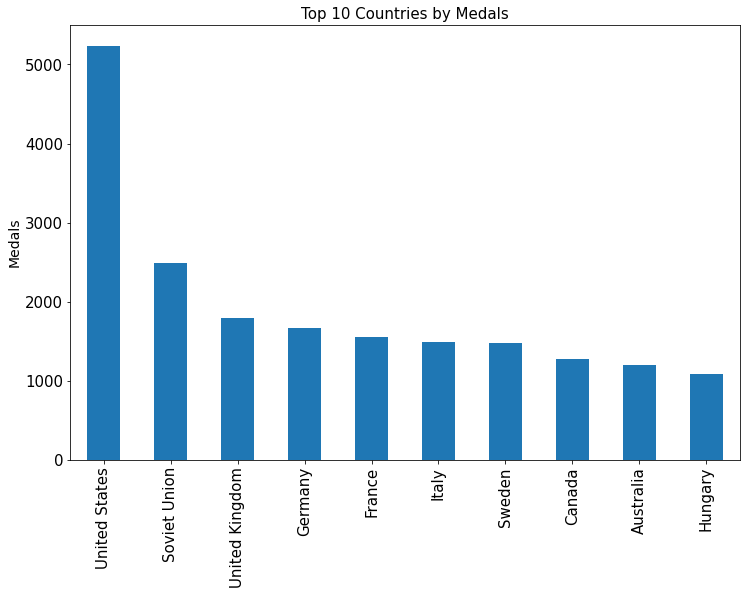

In [31]:
# PLOT IS UNREADABLE!
# plt.figure(figsize=(12,8))
# sns.countplot(data = olympics, x = "Country", hue = "Medal")
# plt.show()

# MATPLOTLIB (we will see all medals together)
top_10 = olympics.Country.value_counts().head(10)

top_10.plot(kind="bar",figsize=(12,8), fontsize=15)
plt.title("Top 10 Countries by Medals", fontsize=15)
plt.ylabel("Medals", fontsize=14)
plt.show()

In [32]:
# SEABORN (we will see all medals split by category)
olympics_10 = olympics[olympics.Country.isin(top_10.index)] # Filter dataframe by indexes of top 10 countries
olympics_10

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.543460
6,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary,9844686.0,12363.543460
11,Summer,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze,United States,321418820.0,56115.718426
12,Summer,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary,9844686.0,12363.543460
13,Summer,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold,United States,321418820.0,56115.718426
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36928,Winter,2014,Sochi,Skiing,Snowboard,"KOBER, Amelie",GER,Women,Parallel Slalom,Bronze,Germany,81413145.0,41313.313995
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom,65138232.0,43875.969614
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States,321418820.0,56115.718426
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada,35851774.0,43248.529909


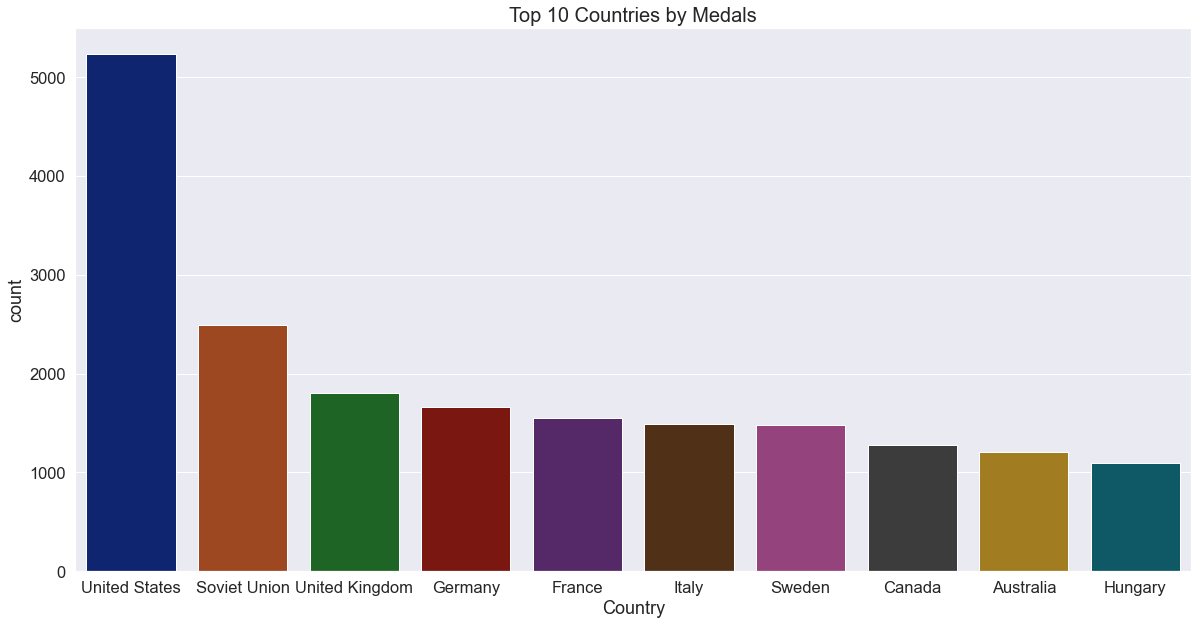

In [33]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = olympics_10, x = "Country", order = top_10.index)
plt.title("Top 10 Countries by Medals", fontsize=20)
plt.show()

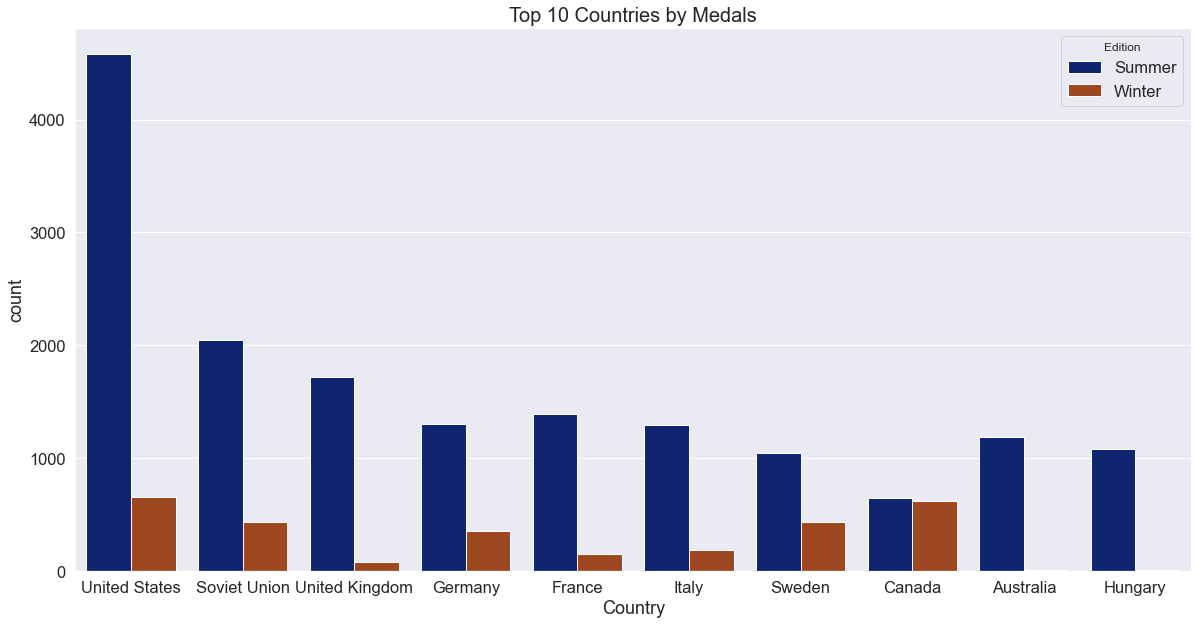

In [34]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = olympics_10, x = "Country", order = top_10.index, hue="Edition")
plt.title("Top 10 Countries by Medals", fontsize=20)
plt.show()

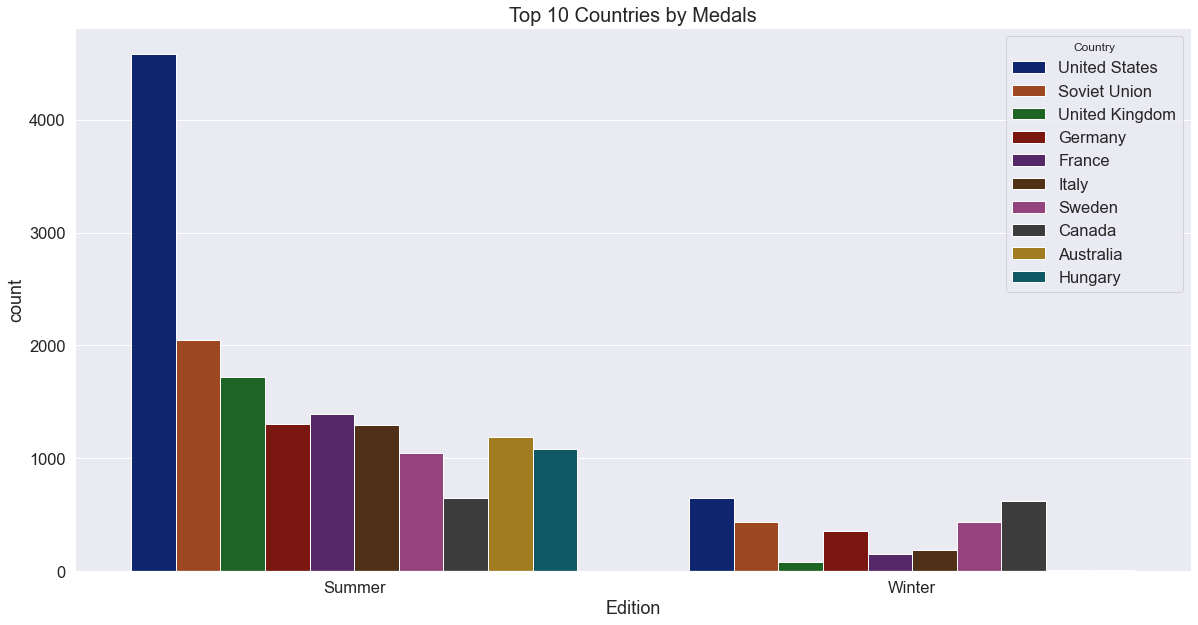

In [35]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = olympics_10, x = "Edition", hue="Country", hue_order = top_10.index) # Notice the order logic!
plt.title("Top 10 Countries by Medals", fontsize=20)
plt.show()

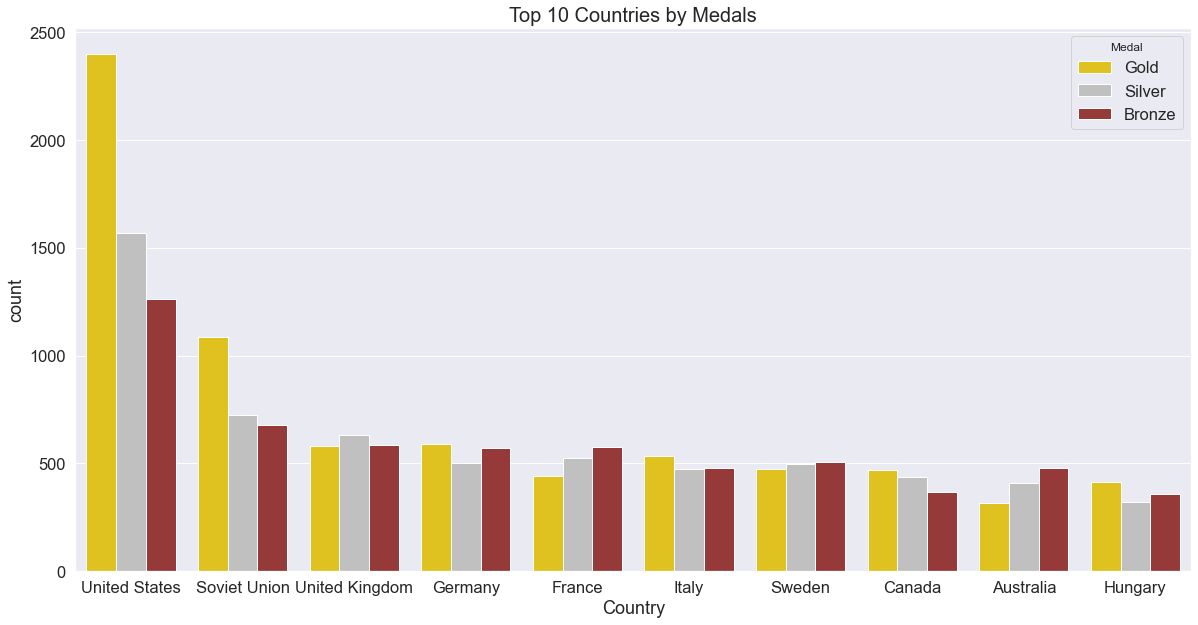

In [36]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = olympics_10, x = "Country", order = top_10.index, hue="Medal", hue_order = ["Gold","Silver","Bronze"],
             palette=["gold","silver","brown"])
plt.title("Top 10 Countries by Medals", fontsize=20)
plt.show()

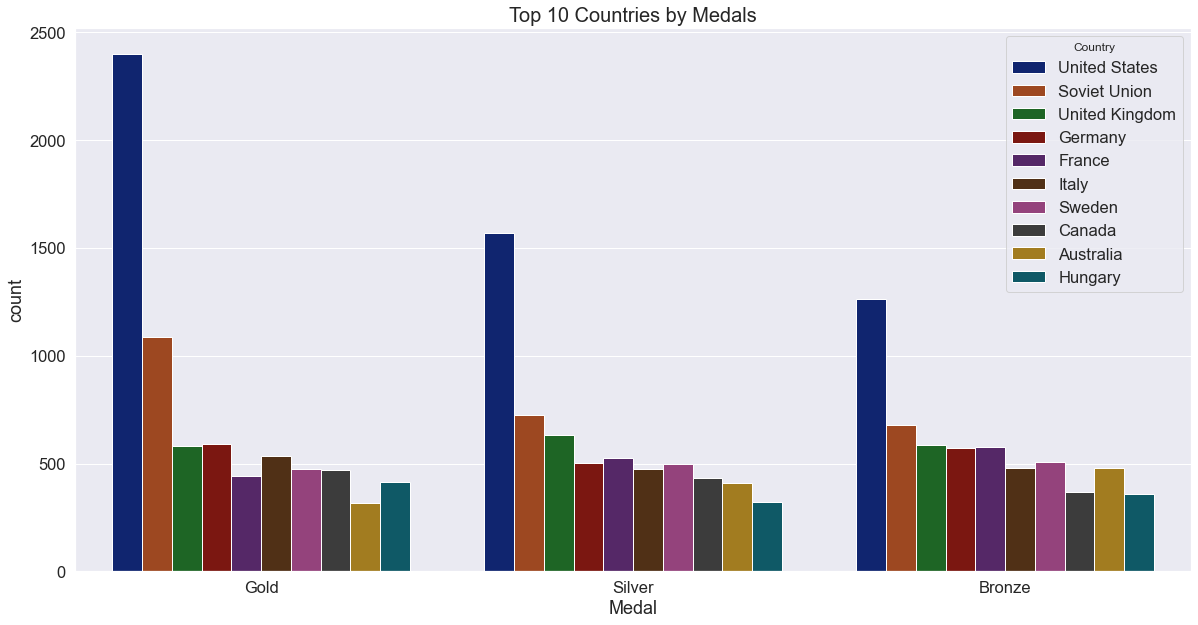

In [37]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = olympics_10, x = "Medal", order = ["Gold","Silver","Bronze"], hue="Country", hue_order = top_10.index)
plt.title("Top 10 Countries by Medals", fontsize=20)
plt.show()

## Do GDP, Population and Politics matter?

1. Create the following __aggregated and merged__ DataFrame with __Top 50 Countries__ (you can see an excerpt with the first 12 Countries). The Column __Total_Games__ shows the __number of Participations__ (as an approximation: determine the number of Editions where Countries have won at least one medal).

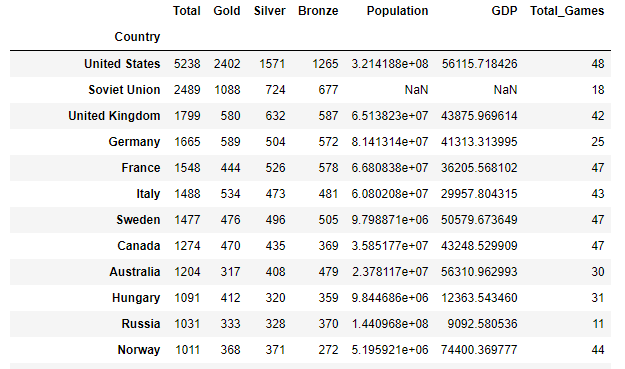

In [38]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.543460
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,8611088.0,43774.985174
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,10823732.0,18002.230578
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,10823732.0,18002.230578
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,10823732.0,18002.230578
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom,65138232.0,43875.969614
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States,321418820.0,56115.718426
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada,35851774.0,43248.529909
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic,10551219.0,17548.338213


In [39]:
#olympics_50

#pd.crosstab(olympics.Country,olympics.Medal)
olympics_50 = pd.crosstab(olympics.Country,olympics.Medal, margins=True, margins_name="Total") # Add total column

olympics_50.drop(axis=0, index="Total", inplace=True)                                          # Drop the last row "Total"

olympics_50 = olympics_50[["Total","Gold","Silver","Bronze"]]                                  # Reorder columns
olympics_50.sort_values(by="Total", ascending=False, inplace=True)                             # Reorder rows

#olympics_50.head(50)

In [40]:
# Merge with dictionary, keeping left as index, not a COLUMN!!!
# Drop the Code column, rename GDP column and set Country as your merged index
olympics_50 = olympics_50.merge(dictionary, how = "left", left_index=True, right_on = "Country", indicator = False)
olympics_50.drop(columns="Code", inplace=True)
olympics_50.rename(columns = {"GDP per Capita":"GDP"}, inplace=True)
olympics_50.set_index("Country", inplace=True)
olympics_50

,Total,Gold,Silver,Bronze,Population,GDP
Country,,,,,,
United States,5238,2402,1571,1265,321418820.0,56115.718426
Soviet Union,2489,1088,724,677,NaN,NaN
United Kingdom,1799,580,632,587,65138232.0,43875.969614
Germany,1665,589,504,572,81413145.0,41313.313995
France,1548,444,526,578,66808385.0,36205.568102
...,...,...,...,...,...,...
Togo,1,0,0,1,7304578.0,559.635877
Mauritius,1,0,0,1,1262605.0,9252.110724
Macedonia,1,0,0,1,2078453.0,4852.657848


In [41]:
# All unique games = Year*City
olympics.nunique()

Edition           2
Year             33
City             41
Sport            48
Discipline       80
Athlete       26495
Code            148
Gender            2
Event           733
Medal             3
Country         145
Population      127
GDP             118
dtype: int64

In [42]:
# Some cities host more than 1 game. With 2 editions, double the value could have taken place in the same city at the same year!
# CONCATENATION COLUMN
olympics["Games"] = olympics.apply(lambda x: str(x.Year) + " " + x.City, axis=1)

In [43]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP,Games
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.543460,1896 Athens
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,8611088.0,43774.985174,1896 Athens
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,10823732.0,18002.230578,1896 Athens
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,10823732.0,18002.230578,1896 Athens
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,10823732.0,18002.230578,1896 Athens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom,65138232.0,43875.969614,2014 Sochi
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States,321418820.0,56115.718426,2014 Sochi
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada,35851774.0,43248.529909,2014 Sochi
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic,10551219.0,17548.338213,2014 Sochi


In [44]:
olympics.nunique()

Edition           2
Year             33
City             41
Sport            48
Discipline       80
Athlete       26495
Code            148
Gender            2
Event           733
Medal             3
Country         145
Population      127
GDP             118
Games            49
dtype: int64

In [45]:
olympics.Games.value_counts()

2008 Beijing                   2042
2000 Sydney                    2015
2004 Athens                    1998
2012 London                    1949
1996 Atlanta                   1859
1992 Barcelona                 1705
1988 Seoul                     1546
1984 Los Angeles               1459
1980 Moscow                    1387
1976 Montreal                  1305
1920 Antwerp                   1298
1972 Munich                    1185
1968 Mexico                    1031
1964 Tokyo                     1010
1952 Helsinki                   889
1912 Stockholm                  885
1956 Melbourne / Stockholm      885
1924 Paris                      884
1960 Rome                       882
1936 Berlin                     875
1948 London                     814
1908 London                     804
1928 Amsterdam                  710
1932 Los Angeles                615
2014 Sochi                      612
2006 Turin                      531
2010 Vancouver                  529
1900 Paris                  

In [46]:
olympics.groupby("Country").apply(lambda x: x.Games.nunique())

Country
Afghanistan         2
Algeria             6
Argentina          18
Armenia             4
Australasia         2
                   ..
Virgin Islands*     1
West Germany       12
Yugoslavia         18
Zambia              2
Zimbabwe            3
Length: 145, dtype: int64

In [47]:
olympics_50["Total Games"] = olympics.groupby("Country").apply(lambda x: x.Games.nunique())

In [48]:
olympics_50

,Total,Gold,Silver,Bronze,Population,GDP,Total Games
Country,,,,,,,
United States,5238,2402,1571,1265,321418820.0,56115.718426,48
Soviet Union,2489,1088,724,677,NaN,NaN,18
United Kingdom,1799,580,632,587,65138232.0,43875.969614,42
Germany,1665,589,504,572,81413145.0,41313.313995,25
France,1548,444,526,578,66808385.0,36205.568102,47
...,...,...,...,...,...,...,...
Togo,1,0,0,1,7304578.0,559.635877,1
Mauritius,1,0,0,1,1262605.0,9252.110724,1
Macedonia,1,0,0,1,2078453.0,4852.657848,1


2. __Convert__ the __absolute values__ in the DataFrame into __ranks__ and save the ranks DataFrame in new variable (see screenshot). Ranks are more meaningful than absolute numbers.

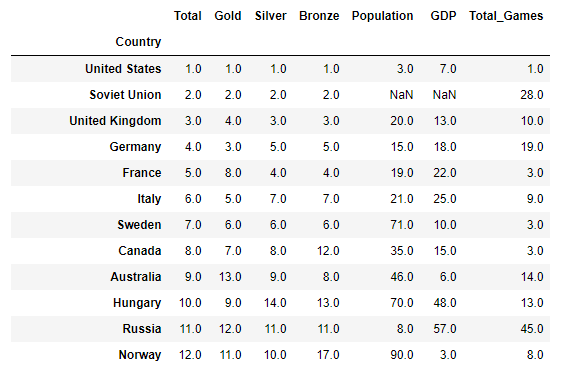

In [49]:
olympics_50_rank = olympics_50.rank(ascending=False)
olympics_50_rank

,Total,Gold,Silver,Bronze,Population,GDP,Total Games
Country,,,,,,,
United States,1.0,1.0,1.0,1.0,3.0,7.0,1.0
Soviet Union,2.0,2.0,2.0,2.0,NaN,NaN,28.0
United Kingdom,3.0,4.0,3.0,3.0,20.0,13.0,10.0
Germany,4.0,3.0,5.0,5.0,15.0,18.0,19.0
France,5.0,8.0,4.0,4.0,19.0,22.0,3.0
...,...,...,...,...,...,...,...
Togo,133.5,122.5,135.0,114.5,80.0,116.0,131.0
Mauritius,133.5,122.5,135.0,114.5,115.0,54.0,131.0
Macedonia,133.5,122.5,135.0,114.5,108.0,77.0,131.0


## Statistical Analysis and Hypothesis Testing with scipy

In the follwing work with __Ranks__!
Check whether __GDP__ (Standard of Living), __Total_Games__ (Political Stability measure) and __Population__ (Size) have an effect on __Total Medals__. (hint: work with spearman correlation, not with pearson correlation)

In [50]:
olympics_50.drop(columns=["Gold","Silver","Bronze"], inplace=True) # You can ignore the warning since it gives you the result!
olympics_50

,Total,Population,GDP,Total Games
Country,,,,
United States,5238,321418820.0,56115.718426,48
Soviet Union,2489,NaN,NaN,18
United Kingdom,1799,65138232.0,43875.969614,42
Germany,1665,81413145.0,41313.313995,25
France,1548,66808385.0,36205.568102,47
...,...,...,...,...
Togo,1,7304578.0,559.635877,1
Mauritius,1,1262605.0,9252.110724,1
Macedonia,1,2078453.0,4852.657848,1


In [51]:
olympics_50.corr(method="pearson") # STANDARD CORRELATION: Assumes values are normally distributed. NOT TRUE, RESTRICTIVE!

,Total,Population,GDP,Total Games
Total,1.000000,0.206606,0.437131,0.712917
Population,0.206606,1.000000,-0.089976,0.123700
GDP,0.437131,-0.089976,1.000000,0.563540
Total Games,0.712917,0.123700,0.563540,1.000000


In [52]:
olympics_50.corr(method="spearman") # RANK CORRELATION

,Total,Population,GDP,Total Games
Total,1.000000,0.419755,0.458478,0.927611
Population,0.419755,1.000000,-0.239097,0.402098
GDP,0.458478,-0.239097,1.000000,0.498056
Total Games,0.927611,0.402098,0.498056,1.000000


In [53]:
olympics_50.rank(ascending=False).corr(method="pearson") # Returns SPEARMAN CORRELATION (mostly...)

,Total,Population,GDP,Total Games
Total,1.000000,0.419634,0.458508,0.927611
Population,0.419634,1.000000,-0.239567,0.401448
GDP,0.458508,-0.239567,1.000000,0.497109
Total Games,0.927611,0.401448,0.497109,1.000000


#### Hypothesis 1: There is no relationship between Total Medals and Population

In [54]:
stats.spearmanr(olympics_50_rank.Total, olympics_50_rank.Population, nan_policy="omit")
# Same correlation as shown in olympics_50.corr(method="spearman") # RANK CORRELATION

SpearmanrResult(correlation=0.41975527887063924, pvalue=8.132240868116897e-07)

In [55]:
r, p_value = stats.spearmanr(olympics_50_rank.Total, olympics_50_rank.Population, nan_policy="omit") # Store r and p_value
print(r)
print(round(p_value)) # p_value very close to ZERO -> We can conclude there is a significant relationship

0.41975527887063924
0.0


#### Reject Hypothesis 1: There is a relationship

#### Hypothesis 2: There is no relationship between Total Medals and GDP

In [56]:
stats.spearmanr(olympics_50_rank.Total, olympics_50_rank.GDP, nan_policy="omit")
# Same correlation as shown in olympics_50.corr(method="spearman") # RANK CORRELATION

SpearmanrResult(correlation=0.45847787983426685, pvalue=1.5758169913239602e-07)

In [57]:
r, p_value = stats.spearmanr(olympics_50_rank.Total, olympics_50_rank.GDP, nan_policy="omit") # Store r and p_value
print(r)
print(round(p_value)) # p_value very close to ZERO -> We can conclude there is a significant relationship

0.45847787983426685
0.0


#### Reject Hypothesis 2: There is a relationship

#### Hypothesis 3: There is no relationship between Total Medals and Total Games

In [58]:
stats.spearmanr(olympics_50_rank.Total, olympics_50_rank["Total Games"], nan_policy="omit")
# Same correlation as shown in olympics_50.corr(method="spearman") # RANK CORRELATION

SpearmanrResult(correlation=0.9276106841243015, pvalue=5.026540188200113e-63)

In [59]:
r, p_value = stats.spearmanr(olympics_50_rank.Total, olympics_50_rank["Total Games"], nan_policy="omit") # Store r and p_value
print(r)
print(round(p_value)) # p_value very close to ZERO -> We can conclude there is a significant relationship

0.9276106841243015
0.0


#### Reject Hypothesis 3: There is a relationship

## Aggregating and Ranking

Create the following __Seaborn Heatmap__ with __Medal Ranks__ for Top 50 Countries (Total Medals, Summer Games Medals, Winter Games Medals, Men, Women).

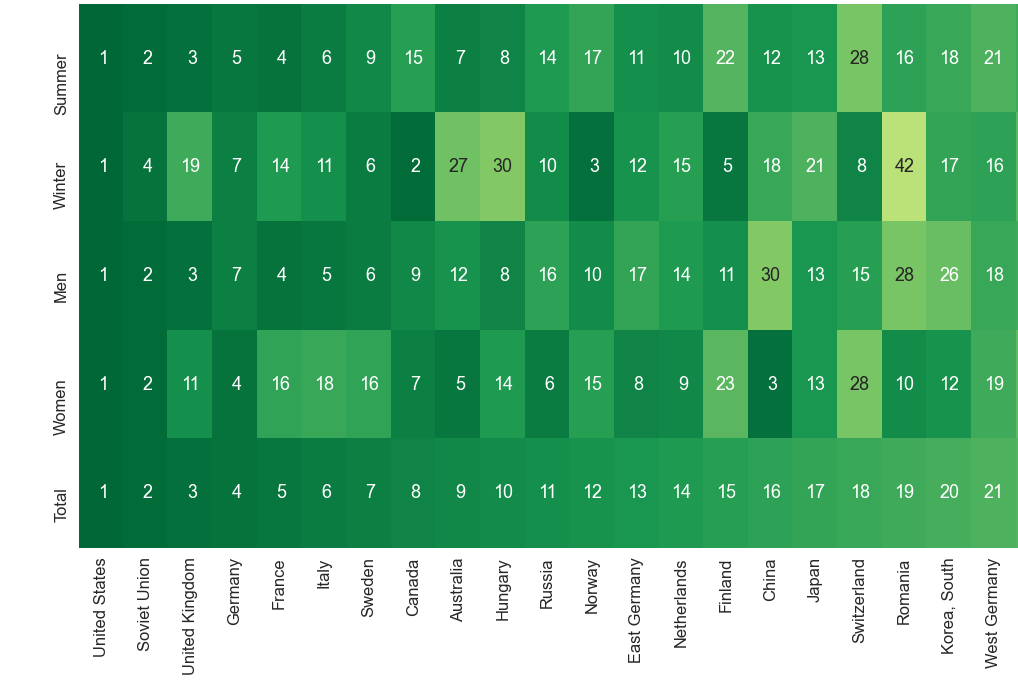

In [60]:
SumVsWin = pd.crosstab(index=olympics.Country,columns=olympics.Edition)
SumVsWin

Edition,Summer,Winter
Country,,
Afghanistan,2,0
Algeria,15,0
Argentina,259,0
Armenia,11,0
Australasia,29,0
...,...,...
Virgin Islands*,1,0
West Germany,490,94
Yugoslavia,435,7


In [61]:
MenVsWomen = pd.crosstab(index=olympics.Country,columns=olympics.Gender)
MenVsWomen

Gender,Men,Women
Country,,
Afghanistan,2,0
Algeria,12,3
Argentina,187,72
Armenia,11,0
Australasia,27,2
...,...,...
Virgin Islands*,1,0
West Germany,450,134
Yugoslavia,379,63


In [62]:
# New Dataframe required for that chart
Medals_by_Categories = pd.concat([SumVsWin,MenVsWomen],axis=1)
Medals_by_Categories

,Summer,Winter,Men,Women
Country,,,,
Afghanistan,2,0,2,0
Algeria,15,0,12,3
Argentina,259,0,187,72
Armenia,11,0,11,0
Australasia,29,0,27,2
...,...,...,...,...
Virgin Islands*,1,0,1,0
West Germany,490,94,450,134
Yugoslavia,435,7,379,63


In [63]:
Medals_by_Categories["Total"] = Medals_by_Categories.Summer + Medals_by_Categories.Winter
Medals_by_Categories

,Summer,Winter,Men,Women,Total
Country,,,,,
Afghanistan,2,0,2,0,2
Algeria,15,0,12,3,15
Argentina,259,0,187,72,259
Armenia,11,0,11,0,11
Australasia,29,0,27,2,29
...,...,...,...,...,...
Virgin Islands*,1,0,1,0,1
West Germany,490,94,450,134,584
Yugoslavia,435,7,379,63,442


In [64]:
Medals_by_Categories.sort_values(by="Total", ascending=False, inplace=True)
Medals_by_Categories

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,4585,653,3618,1620,5238
Soviet Union,2049,440,1807,682,2489
United Kingdom,1720,79,1470,329,1799
Germany,1305,360,1119,546,1665
France,1396,152,1351,197,1548
...,...,...,...,...,...
Togo,1,0,1,0,1
Mauritius,1,0,1,0,1
Macedonia,1,0,1,0,1


In [65]:
Medals_by_Categories_rank = Medals_by_Categories.rank(ascending=False)
Medals_by_Categories_rank

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Soviet Union,2.0,4.0,2.0,2.0,2.0
United Kingdom,3.0,19.0,3.0,11.0,3.0
Germany,5.0,7.0,7.0,4.0,4.0
France,4.0,14.0,4.0,16.5,5.0
...,...,...,...,...,...
Togo,132.5,95.5,127.0,120.0,133.5
Mauritius,132.5,95.5,127.0,120.0,133.5
Macedonia,132.5,95.5,127.0,120.0,133.5


In [66]:
top_50 = Medals_by_Categories_rank.head(50)
top_50

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Soviet Union,2.0,4.0,2.0,2.0,2.0
United Kingdom,3.0,19.0,3.0,11.0,3.0
Germany,5.0,7.0,7.0,4.0,4.0
France,4.0,14.0,4.0,16.5,5.0
Italy,6.0,11.0,5.0,18.0,6.0
Sweden,9.0,6.0,6.0,16.5,7.0
Canada,15.0,2.0,9.0,7.0,8.0
Australia,7.0,27.0,12.0,5.0,9.0


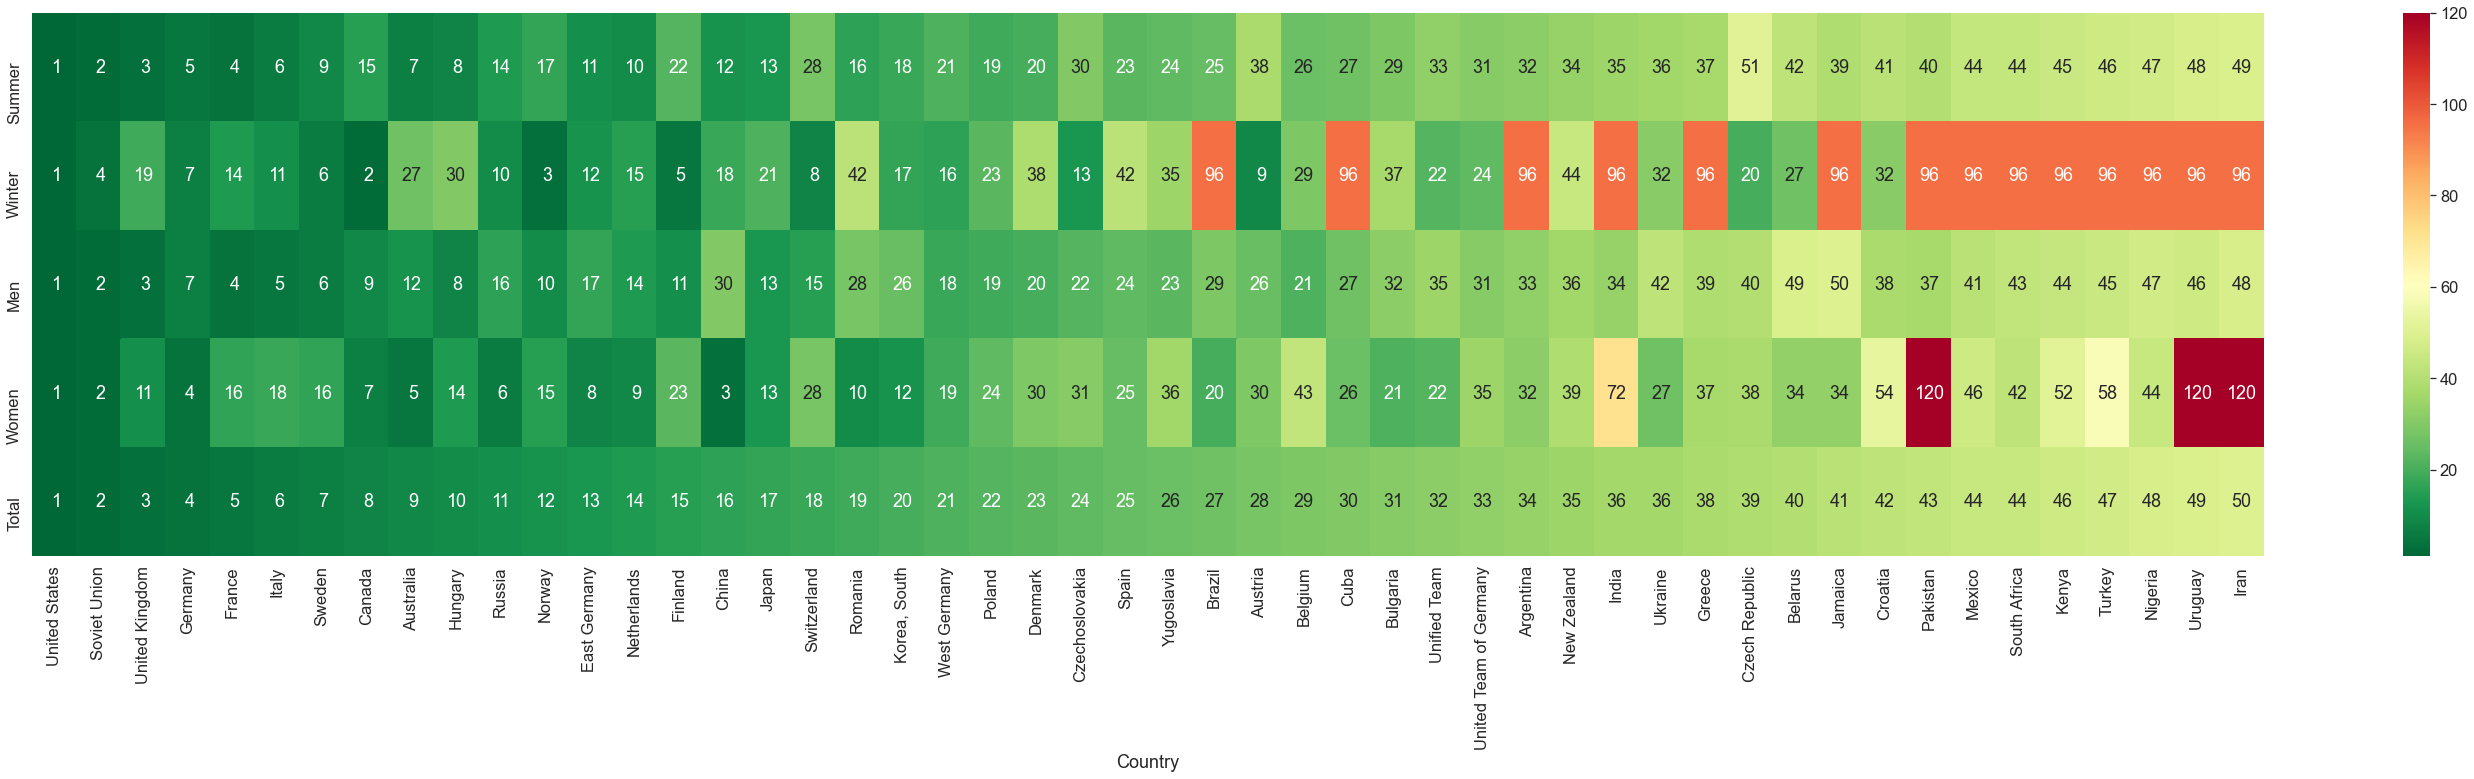

In [77]:
plt.figure(figsize=(50,10))
sns.heatmap(top_50.transpose(), annot= True, cmap = "RdYlGn_r", fmt="2.0f")
plt.show()

## Summer Games vs. Winter Games - does Geographical Location matter?

__Identify Countries__ that are 
1. __equally successful__ in Summer and Winter Games
2. more successful in __Summer Games__
3. more successful in __Winter Games__


What could be the reasons?

In [75]:
top_50.sort_values(by=["Summer","Winter"])

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Soviet Union,2.0,4.0,2.0,2.0,2.0
United Kingdom,3.0,19.0,3.0,11.0,3.0
France,4.0,14.0,4.0,16.5,5.0
Germany,5.0,7.0,7.0,4.0,4.0
Italy,6.0,11.0,5.0,18.0,6.0
Australia,7.0,27.0,12.0,5.0,9.0
Hungary,8.0,30.0,8.0,14.0,10.0
Sweden,9.0,6.0,6.0,16.5,7.0


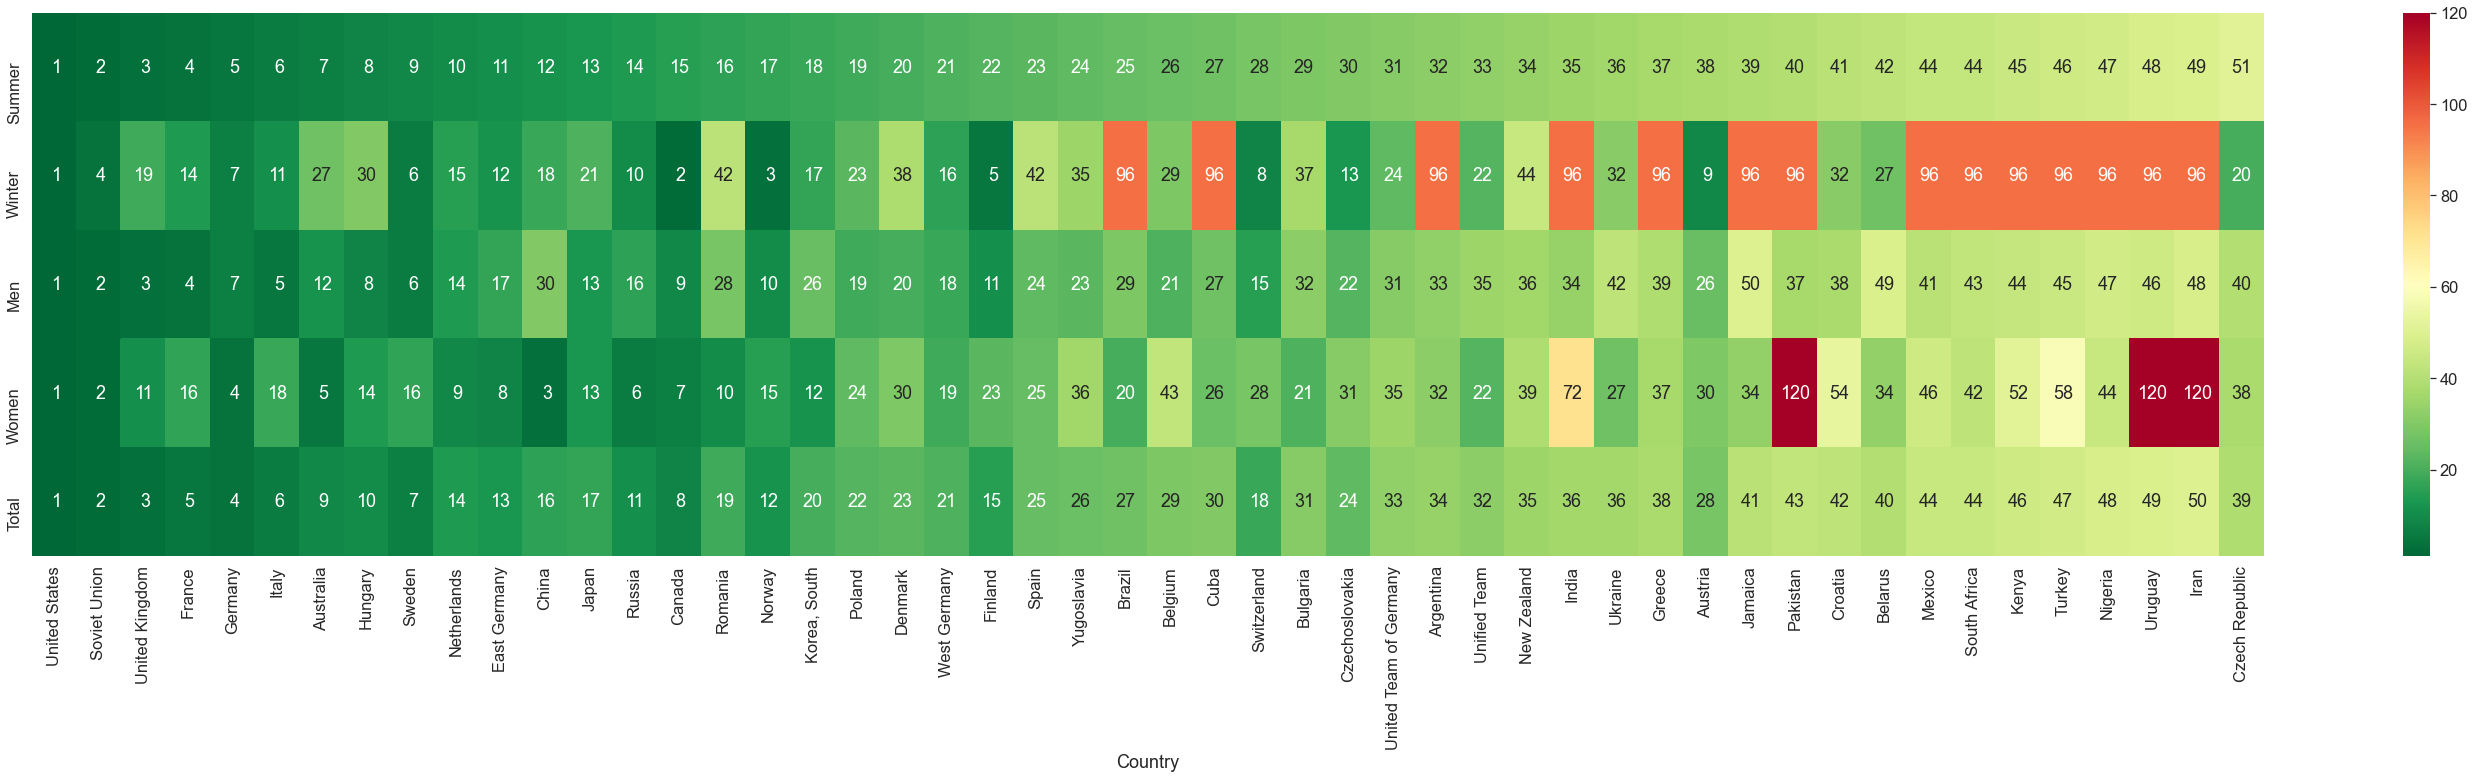

In [76]:
plt.figure(figsize=(50,10))
sns.heatmap(top_50.sort_values(by="Summer").transpose(), annot= True, cmap = "RdYlGn_r", fmt="2.0f")
plt.show()

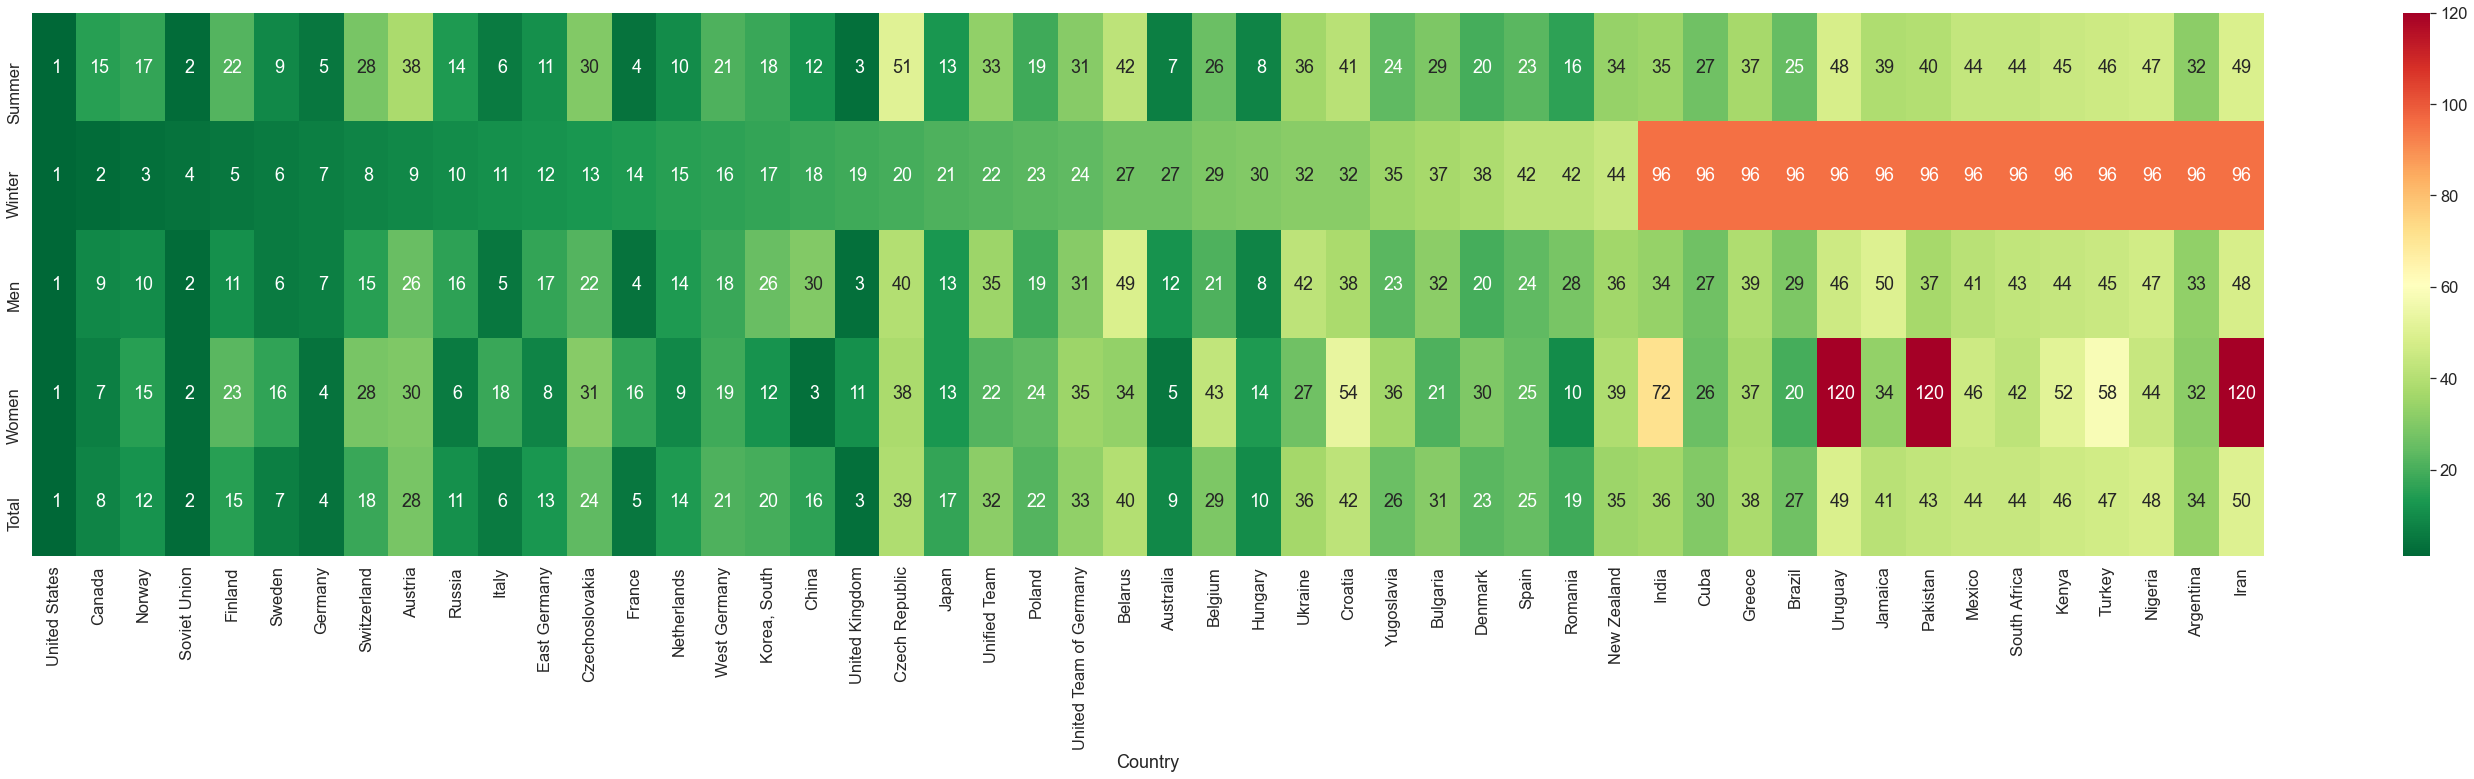

In [78]:
plt.figure(figsize=(50,10))
sns.heatmap(top_50.sort_values(by="Winter").transpose(), annot= True, cmap = "RdYlGn_r", fmt="2.0f")
plt.show()

In [83]:
# Equally successful, i.e., difference is equal to ZERO
top_50.Summer.sub(top_50.Winter).sort_values()
rank_diff = top_50.Summer.sub(top_50.Winter).sort_values().to_frame()
rank_diff

,0
Country,
Brazil,-70.5
Cuba,-68.5
Argentina,-63.5
India,-60.5
Greece,-58.5
Jamaica,-56.5
Pakistan,-55.5
South Africa,-52.0
Mexico,-52.0


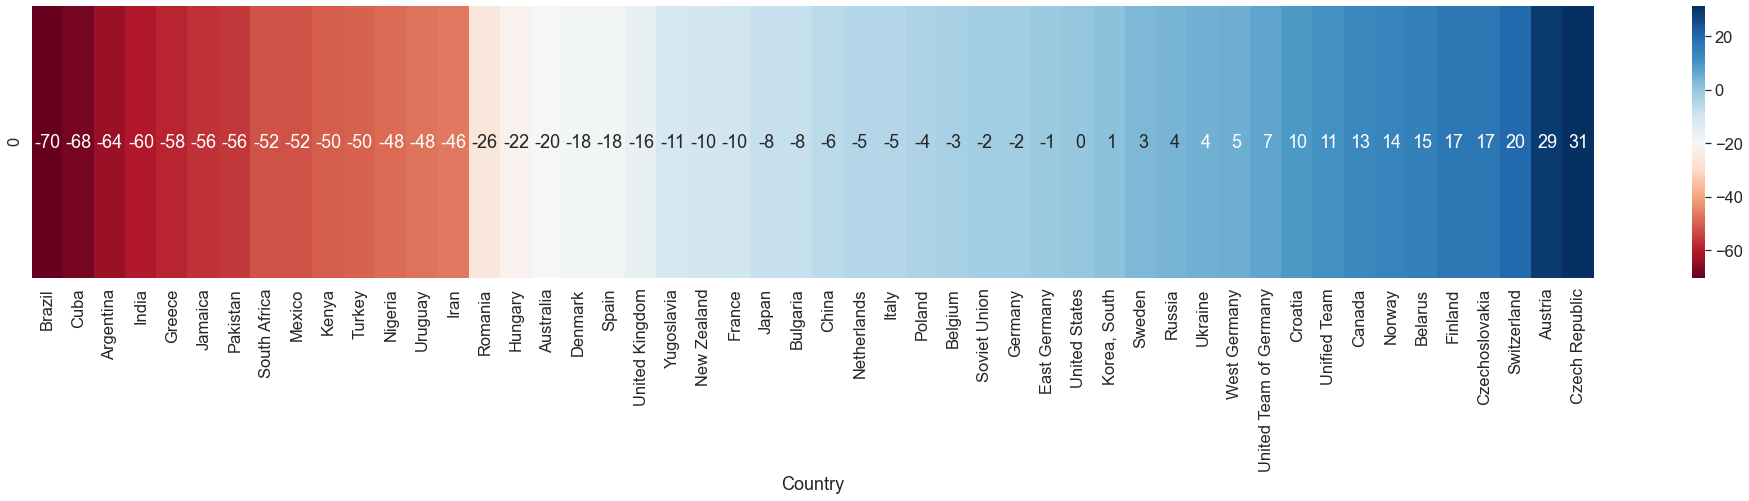

In [85]:
plt.figure(figsize=(35,5))
sns.heatmap(rank_diff.transpose(), annot= True, cmap = "RdBu", fmt="2.0f")
plt.show()

## Men vs. Women - does Culture & Religion matter?

__Identify Countries__ where
1. Men and Women are __equally successful__
2. __Men__ are more successful
3. __Women__ are more successful

What could be the reasons?

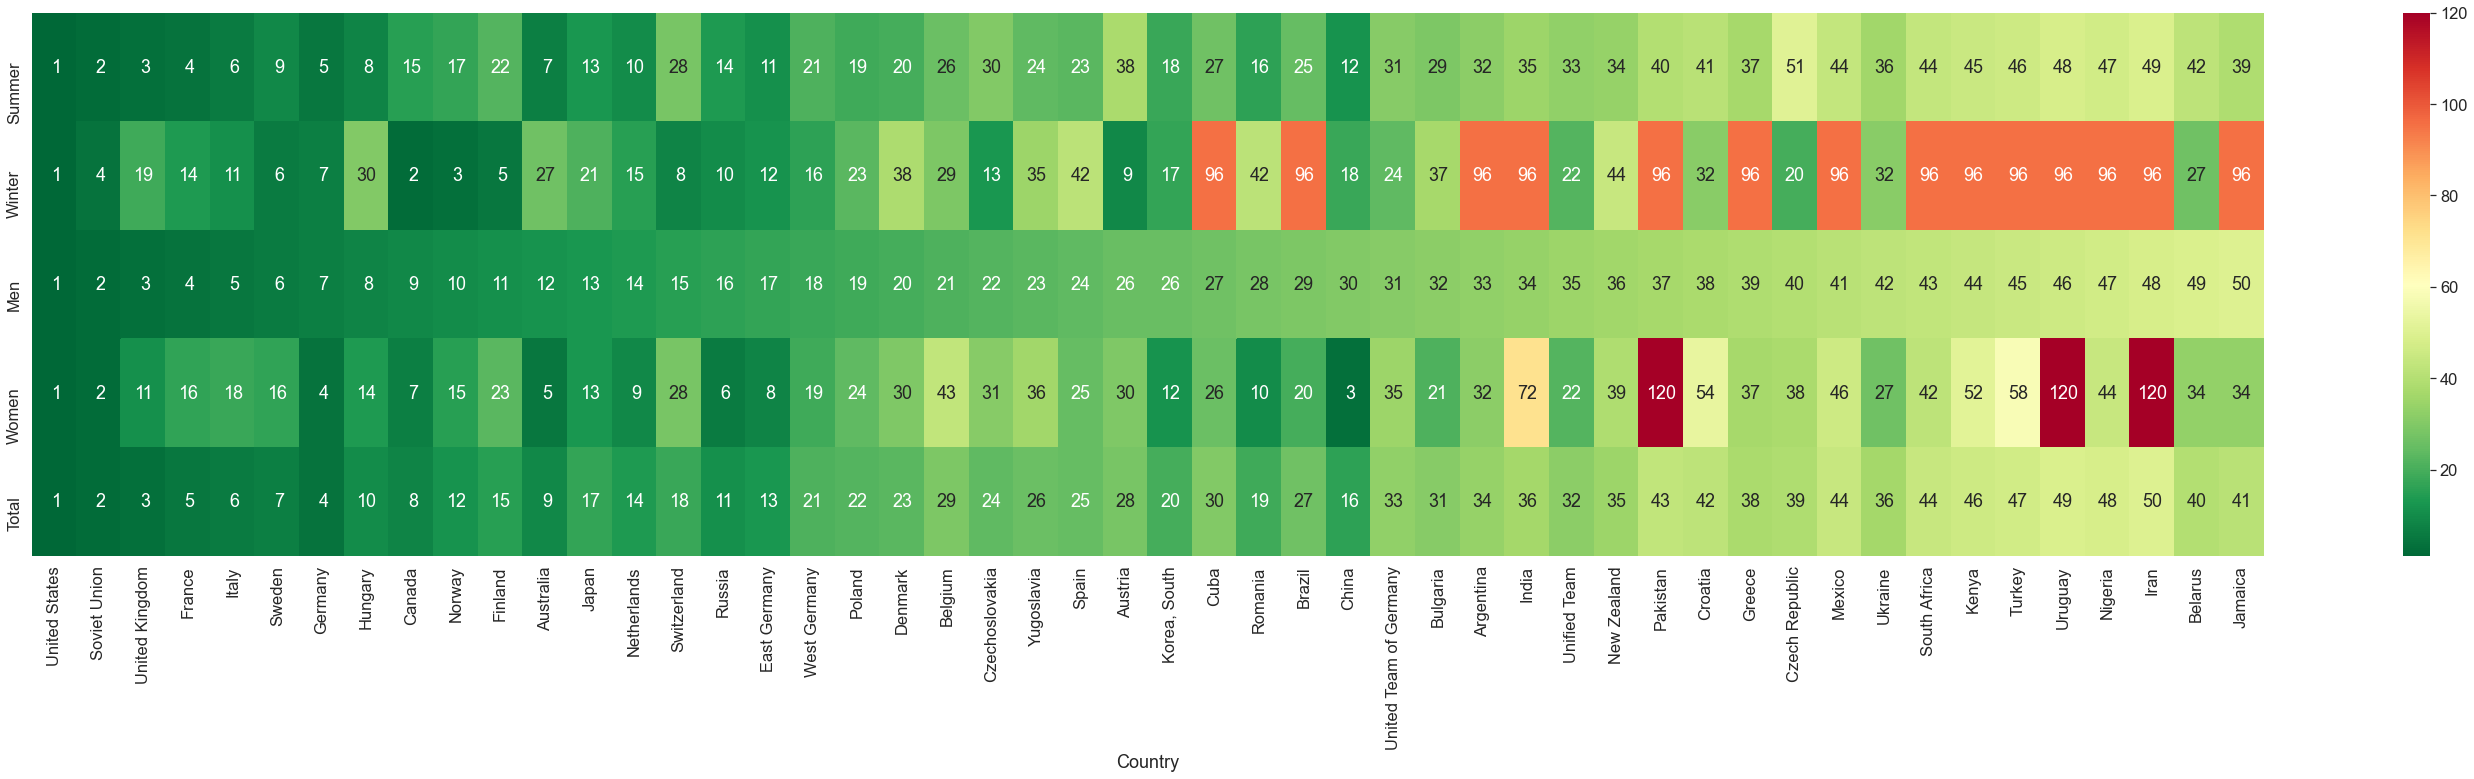

In [86]:
plt.figure(figsize=(50,10))
sns.heatmap(top_50.sort_values(by="Men").transpose(), annot= True, cmap = "RdYlGn_r", fmt="2.0f")
plt.show()

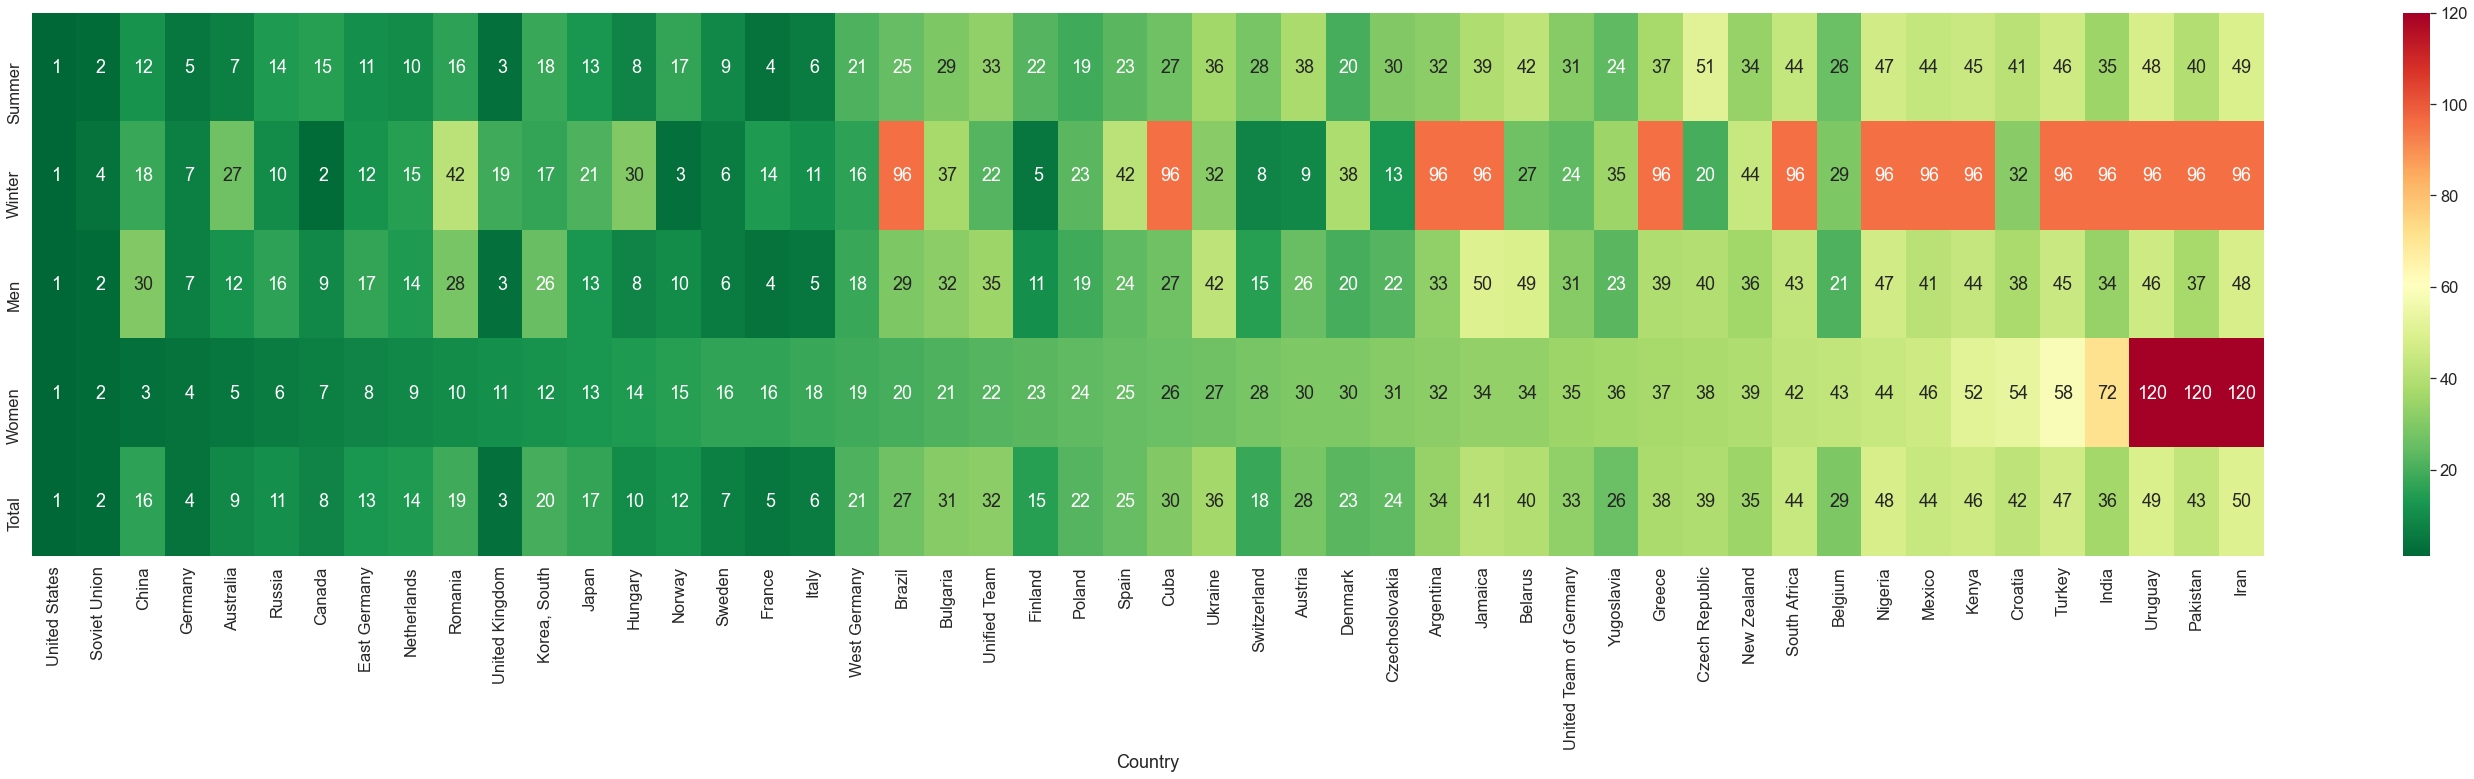

In [87]:
plt.figure(figsize=(50,10))
sns.heatmap(top_50.sort_values(by="Women").transpose(), annot= True, cmap = "RdYlGn_r", fmt="2.0f")
plt.show()

In [89]:
# Equally successful, i.e., difference is equal to ZERO
top_50.Men.sub(top_50.Women).sort_values()
gender_rank_diff = top_50.Men.sub(top_50.Women).sort_values().to_frame()
gender_rank_diff

,0
Country,
Pakistan,-83.0
Uruguay,-74.0
Iran,-72.0
India,-37.5
Belgium,-22.0
Croatia,-15.5
Turkey,-13.5
Yugoslavia,-13.0
Italy,-13.0


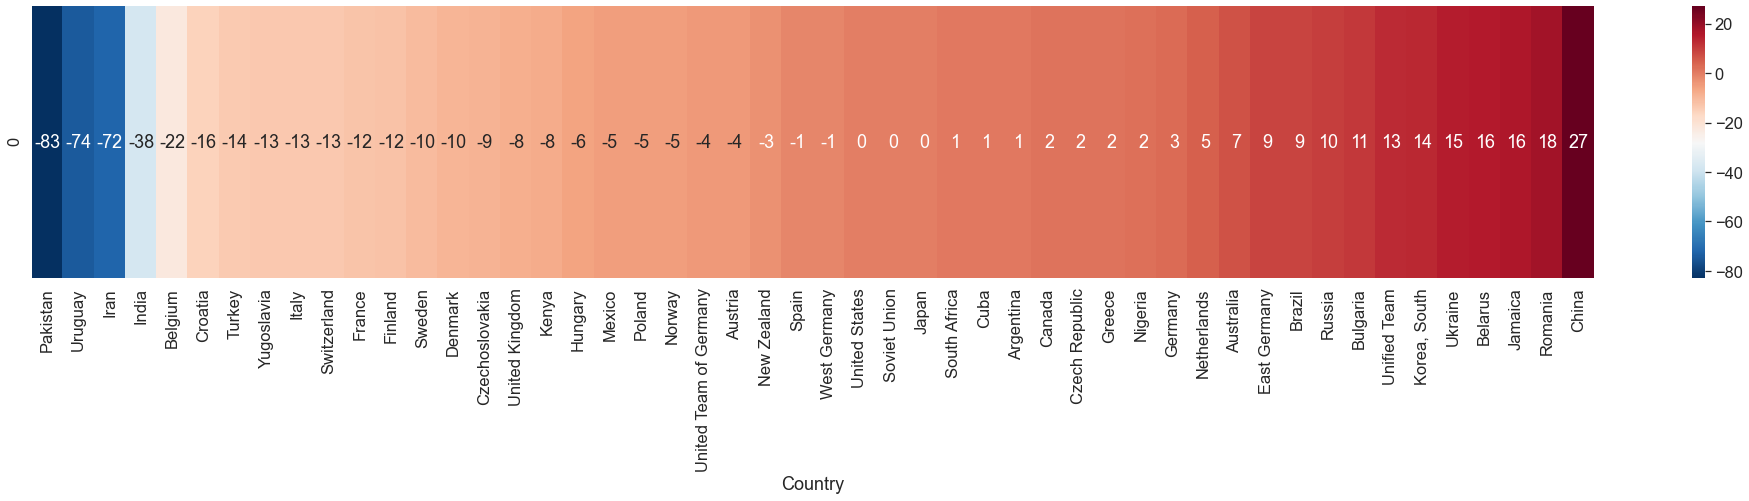

In [94]:
plt.figure(figsize=(35,5))
sns.heatmap(gender_rank_diff.transpose(), annot= True, cmap = "RdBu_r", fmt="2.0f")
plt.show()

## Do Traditions matter?

Create the following __Seaborn Heatmap__ that shows the __Ranks__ of Top 20 Countries __by Sports__. <br>
Identify traditional Sports / National Sports for e.g. UK and China!

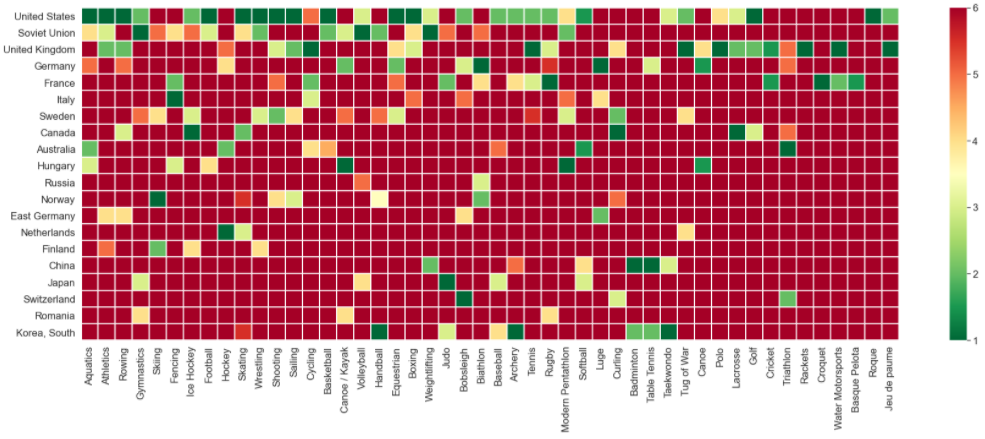

In [95]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP,Games
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.543460,1896 Athens
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,8611088.0,43774.985174,1896 Athens
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,10823732.0,18002.230578,1896 Athens
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,10823732.0,18002.230578,1896 Athens
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,10823732.0,18002.230578,1896 Athens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom,65138232.0,43875.969614,2014 Sochi
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States,321418820.0,56115.718426,2014 Sochi
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada,35851774.0,43248.529909,2014 Sochi
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic,10551219.0,17548.338213,2014 Sochi


In [106]:
sports=olympics.Sport.value_counts().index # Saves all Sports' names
sports

Index(['Aquatics', 'Athletics', 'Rowing', 'Gymnastics', 'Skiing', 'Fencing',
       'Ice Hockey', 'Football', 'Hockey', 'Skating', 'Wrestling', 'Shooting',
       'Sailing', 'Cycling', 'Basketball', 'Canoe / Kayak', 'Volleyball',
       'Handball', 'Equestrian', 'Boxing', 'Weightlifting', 'Judo',
       'Bobsleigh', 'Biathlon', 'Baseball', 'Archery', 'Tennis', 'Rugby',
       'Softball', 'Luge', 'Modern Pentathlon', 'Curling', 'Table Tennis',
       'Badminton', 'Taekwondo', 'Tug of War', 'Canoe', 'Polo', 'Lacrosse',
       'Golf', 'Triathlon', 'Cricket', 'Rackets', 'Croquet',
       'Water Motorsports', 'Basque Pelota', 'Roque', 'Jeu de paume'],
      dtype='object')

In [104]:
top_20 = olympics.Country.value_counts().head(20).index # Saves top 20 countries' names!
top_20

Index(['United States', 'Soviet Union', 'United Kingdom', 'Germany', 'France',
       'Italy', 'Sweden', 'Canada', 'Australia', 'Hungary', 'Russia', 'Norway',
       'East Germany', 'Netherlands', 'Finland', 'China', 'Japan',
       'Switzerland', 'Romania', 'Korea, South'],
      dtype='object')

In [109]:
by_sport=pd.crosstab(olympics.Country,olympics.Sport)
by_sport

Sport,Aquatics,Archery,Athletics,Badminton,Baseball,Basketball,Basque Pelota,Biathlon,Bobsleigh,Boxing,...,Softball,Table Tennis,Taekwondo,Tennis,Triathlon,Tug of War,Volleyball,Water Motorsports,Weightlifting,Wrestling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
Algeria,0,0,7,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
Argentina,3,0,5,0,0,24,0,0,0,24,...,0,0,1,6,0,0,12,0,2,0
Armenia,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4,6
Australasia,11,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands*,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
West Germany,62,0,67,0,0,0,0,14,22,6,...,0,0,0,3,0,0,0,0,7,9
Yugoslavia,91,0,2,0,0,96,0,0,0,11,...,0,4,0,0,0,0,24,0,0,16


In [111]:
by_sport_rank=by_sport.rank(ascending=False)
by_sport_rank

Sport,Aquatics,Archery,Athletics,Badminton,Baseball,Basketball,Basque Pelota,Biathlon,Bobsleigh,Boxing,...,Softball,Table Tennis,Taekwondo,Tennis,Triathlon,Tug of War,Volleyball,Water Motorsports,Weightlifting,Wrestling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,101.0,84.0,122.0,78.0,76.0,83.0,74.0,84.5,80.5,112.0,...,75.0,79.0,19.5,90.5,79.0,76.5,86.0,74.0,103.5,103.0
Algeria,101.0,84.0,47.0,78.0,76.0,83.0,74.0,84.5,80.5,35.0,...,75.0,79.0,89.5,90.5,79.0,76.5,86.0,74.0,103.5,103.0
Argentina,41.0,84.0,53.5,78.0,76.0,11.5,74.0,84.5,80.5,9.0,...,75.0,79.0,28.0,12.0,79.0,76.5,17.0,74.0,45.5,103.0
Armenia,101.0,84.0,122.0,78.0,76.0,83.0,74.0,84.5,80.5,70.5,...,75.0,79.0,89.5,90.5,79.0,76.5,86.0,74.0,35.5,40.0
Australasia,30.5,84.0,88.0,78.0,76.0,83.0,74.0,84.5,80.5,70.5,...,75.0,79.0,89.5,31.0,79.0,76.5,86.0,74.0,103.5,103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands*,101.0,84.0,122.0,78.0,76.0,83.0,74.0,84.5,80.5,112.0,...,75.0,79.0,89.5,90.5,79.0,76.5,86.0,74.0,103.5,103.0
West Germany,18.0,84.0,16.0,78.0,76.0,83.0,74.0,9.0,6.5,35.0,...,75.0,79.0,89.5,21.0,79.0,76.5,86.0,74.0,28.5,32.0
Yugoslavia,16.0,84.0,70.0,78.0,76.0,3.0,74.0,84.5,80.5,25.5,...,75.0,5.5,89.5,90.5,79.0,76.5,12.0,74.0,103.5,20.0


In [114]:
# Filter the rank dataframe by the top 20 countries
tradition = by_sport_rank.loc[top_20,sports].copy()
tradition

,Aquatics,Athletics,Rowing,Gymnastics,Skiing,Fencing,Ice Hockey,Football,Hockey,Skating,...,Lacrosse,Golf,Triathlon,Cricket,Rackets,Croquet,Water Motorsports,Basque Pelota,Roque,Jeu de paume
United States,1.0,1.0,1.0,2.0,8.0,7.0,2.0,1.0,12.0,1.0,...,3.0,1.0,9.5,74.0,73.5,73.5,74.0,74.0,1.0,2.0
Soviet Union,4.0,3.0,7.0,1.0,5.0,4.0,5.0,3.0,11.0,4.0,...,74.5,74.5,79.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0
United Kingdom,10.5,2.0,2.0,19.0,34.5,15.0,10.0,20.0,5.0,16.0,...,2.0,2.0,5.0,1.5,1.0,73.5,1.0,74.0,73.5,1.0
Germany,5.0,7.0,5.0,16.0,6.0,6.0,13.0,7.5,4.0,9.0,...,74.5,74.5,5.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0
France,14.0,8.0,11.0,17.0,10.0,2.0,79.5,23.0,83.0,17.0,...,74.5,74.5,79.0,1.5,73.5,1.0,2.0,1.5,73.5,74.0
Italy,12.0,14.0,8.0,8.5,9.0,1.0,79.5,7.5,83.0,11.5,...,74.5,74.5,79.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0
Sweden,15.0,9.0,30.0,5.0,4.0,12.0,3.0,13.5,83.0,15.0,...,74.5,74.5,9.5,74.0,73.5,73.5,74.0,74.0,73.5,74.0
Canada,13.0,12.5,3.0,30.5,12.0,90.0,1.0,22.0,83.0,2.0,...,1.0,3.0,5.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0
Australia,2.0,12.5,9.0,37.0,21.5,90.0,79.5,90.5,2.0,24.0,...,74.5,74.5,1.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0
Hungary,3.0,18.5,32.0,7.0,91.5,3.0,79.5,4.0,83.0,20.0,...,74.5,74.5,79.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0


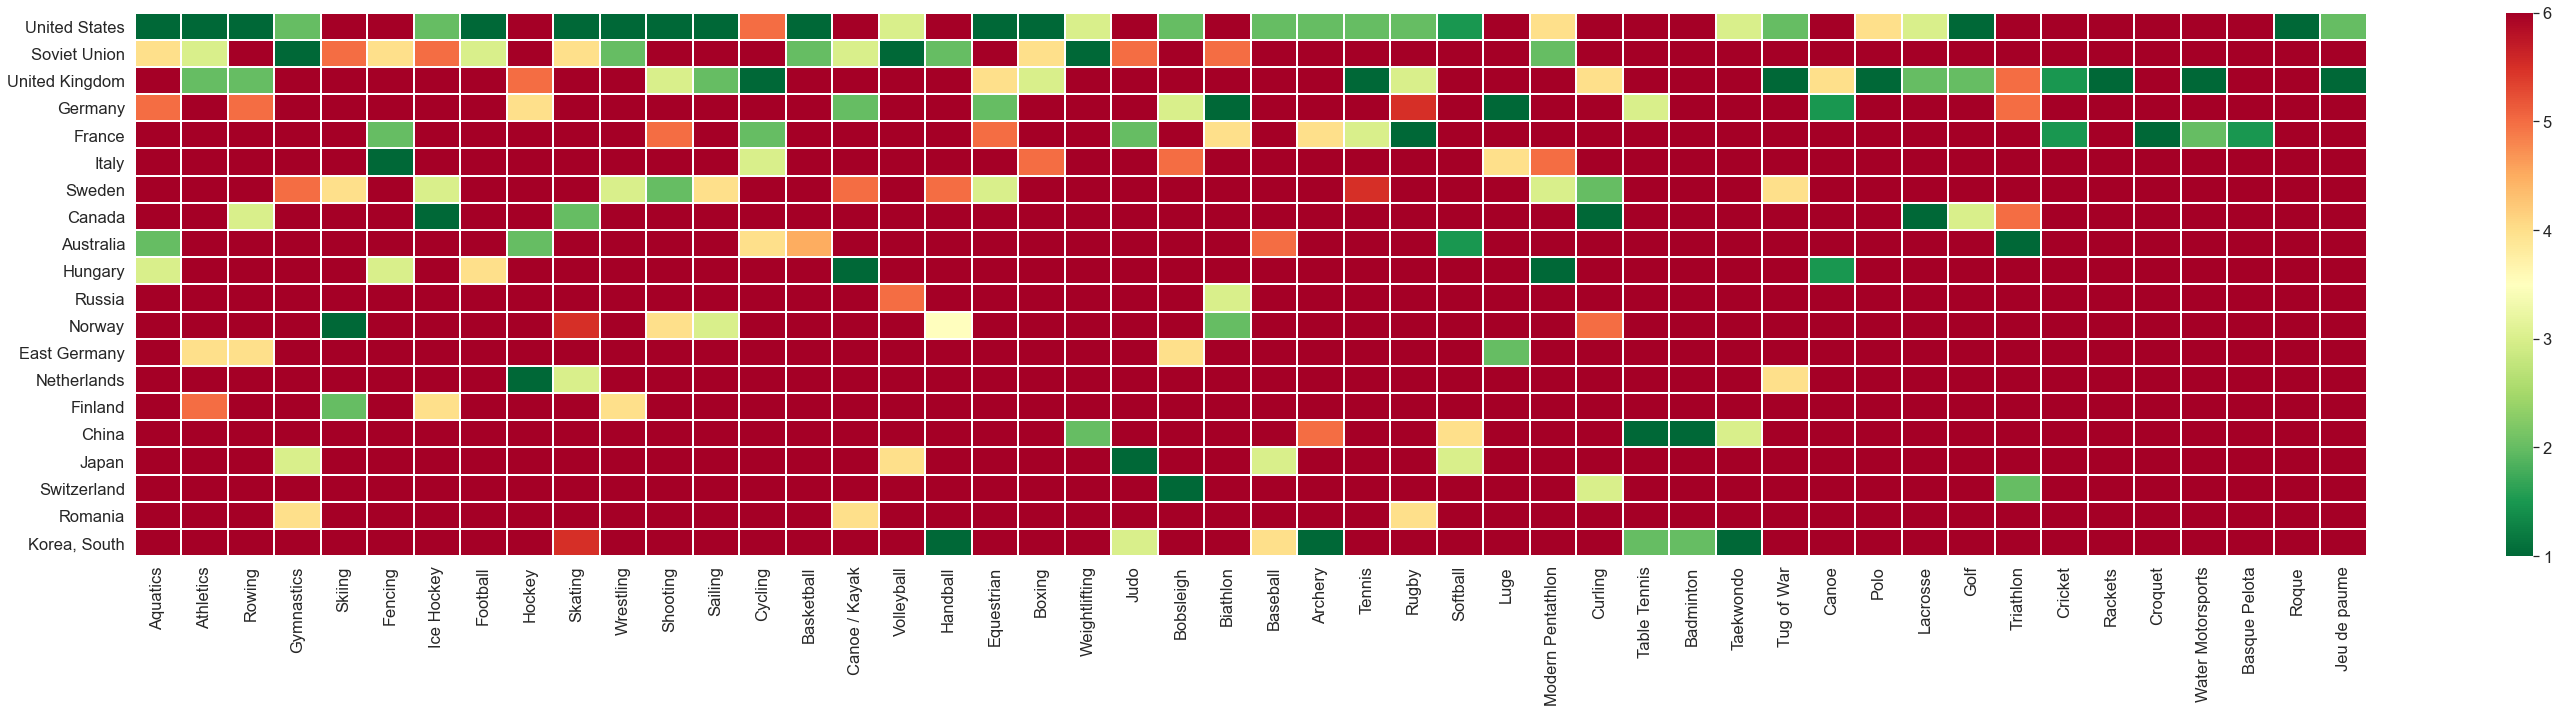

In [119]:
plt.figure(figsize=(50,10))
sns.heatmap(tradition, cmap = "RdYlGn_r", vmin=1, vmax=6, linewidth=1)
plt.show()

# Missing full Country Names (see Data Cleaning Part 1)

In [ ]:
{'URS': 'Soviet Union',
 'GDR': 'East Germany',
 'ROU': 'Romania',
 'FRG': 'West Germany',
 'TCH': 'Czechoslovakia',
 'YUG': 'Yugoslavia',
 'EUN': 'Unified Team',
 'EUA': 'Unified Team of Germany',
 'ZZX': 'Mixed teams',
 'SRB': 'Serbia',
 'ANZ': 'Australasia',
 'RU1': 'Russian Empire',
 'MNE': 'Montenegro',
 'TTO': 'Trinidad and Tobago',
 'BOH': 'Bohemia',
 'BWI': 'West Indies Federation',
 'SGP': 'Singapore',
 'IOP': 'Independent Olympic Participants'}